In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [4]:
health04_S_file_path = "../Resources/Health04/Health04_S.csv"

data = pd.read_csv(health04_S_file_path)

data.head(10)

,G_STATEFP,STATEFP,st_abb,st_name,opPrscRt19,prMisuse19,odMortRt14,odMortRt15,odMortRt16,odMortRt17,odMortRt18,odMortRt19,odMortRtAv
0,G01,1,AL,Alabama,39.1,4.55,15.2,15.7,16.2,18.0,16.6,16.3,16.33
1,G02,2,AK,Alaska,85.8,3.99,16.8,16.0,16.8,20.2,14.6,17.8,17.03
2,G04,4,AZ,Arizona,80.9,3.80,18.2,19.0,20.3,22.2,23.8,26.8,21.72
3,G05,5,AR,Arkansas,44.1,3.66,12.6,13.8,14.0,15.5,15.7,13.5,14.18
4,G06,6,CA,California,30.9,3.60,11.1,11.3,11.2,11.7,12.8,15.0,12.18
5,G08,8,CO,Colorado,40.0,3.94,16.3,15.4,16.6,17.6,16.8,18.0,16.78
6,G09,9,CT,Connecticut,40.5,3.31,17.6,22.1,27.4,30.9,30.7,34.7,27.23
7,G10,10,DE,Delaware,39.9,3.45,20.9,22.0,30.8,37.0,43.8,48.0,33.75
8,G11,11,DC,"Washington, D.C.",51.6,4.16,19.4,14.7,14.5,15.2,22.8,43.2,21.63
9,G12,12,FL,Florida,45.4,3.69,13.2,16.2,23.7,25.1,13.2,25.5,19.48


In [5]:
df = pd.DataFrame(data)
df.dtypes

G_STATEFP      object
STATEFP         int64
st_abb         object
st_name        object
opPrscRt19    float64
prMisuse19    float64
odMortRt14    float64
odMortRt15    float64
odMortRt16    float64
odMortRt17    float64
odMortRt18    float64
odMortRt19    float64
odMortRtAv    float64
dtype: object

### Create historgram to visualize distribution of odMortRtAv

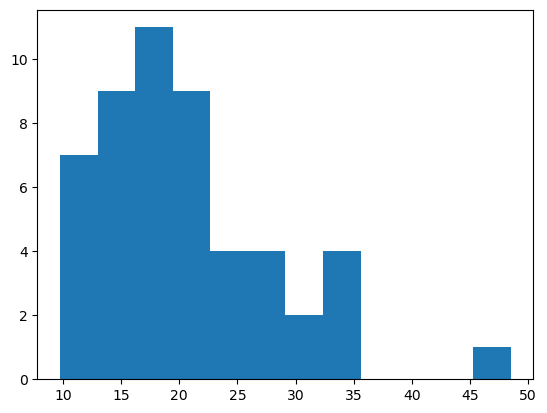

In [45]:
plt.hist(df['odMortRtAv'], bins=12, histtype='bar')
plt.show()

In [51]:
odMortRtAv = df['odMortRtAv']
odMortRtAv.describe()

count    51.000000
mean     20.402353
std       7.617755
min       9.750000
25%      15.200000
50%      18.570000
75%      23.360000
max      48.520000
Name: odMortRtAv, dtype: float64

In [54]:
quartiles = odMortRtAv.quantile([.25,.5,.75]).round(2)
print(quartiles)

0.25    15.20
0.50    18.57
0.75    23.36
Name: odMortRtAv, dtype: float64


In [59]:
upper_quartile = quartiles.iloc[2]
upper_quartile

23.36

### Sort df by AvMortRt in descending order

In [13]:
df_sort_descend = df.sort_values(by=['odMortRtAv'], ascending = False)
df_sort_descend.head(10)

,G_STATEFP,STATEFP,st_abb,st_name,opPrscRt19,prMisuse19,odMortRt14,odMortRt15,odMortRt16,odMortRt17,odMortRt18,odMortRt19,odMortRtAv
48,G54,54,WV,West Virginia,42.5,3.22,35.5,41.5,52.0,57.8,51.5,52.8,48.52
7,G10,10,DE,Delaware,39.9,3.45,20.9,22.0,30.8,37.0,43.8,48.0,33.75
29,G33,33,NH,New Hampshire,50.3,3.38,26.2,34.3,39.0,37.0,33.1,32.0,33.60
35,G39,39,OH,Ohio,50.8,3.95,24.6,29.9,39.1,46.3,18.4,38.3,32.77
38,G42,42,PA,Pennsylvania,47.0,3.17,21.9,26.3,37.9,44.3,30.1,35.6,32.68
17,G21,21,KY,Kentucky,72.3,4.14,24.7,29.9,33.5,37.2,25.4,32.5,30.53
20,G24,24,MD,Maryland,42.3,3.45,17.4,20.9,33.2,36.3,32.8,38.2,29.80
21,G25,25,MA,Massachusetts,44.1,3.24,19.0,25.7,33.0,31.8,26.6,32.1,28.03
19,G23,23,ME,Maine,35.4,3.27,16.8,21.2,28.7,34.4,37.2,29.9,28.03
39,G44,44,RI,Rhode Island,40.3,3.33,23.4,28.2,30.8,31.0,22.6,29.5,27.58


In [95]:
len(df_sort_descend)

51

In [93]:
df_sort_descend.iloc[df_sort_descend['st_name'].count()-1]

G_STATEFP          G31
STATEFP             31
st_abb              NE
st_name       Nebraska
opPrscRt19        56.7
prMisuse19        3.31
odMortRt14         7.2
odMortRt15         6.9
odMortRt16         6.4
odMortRt17         8.1
odMortRt18        21.2
odMortRt19         8.7
odMortRtAv        9.75
Name: 27, dtype: object

### Create bar plot to visualize all States and their respective AvMortRts

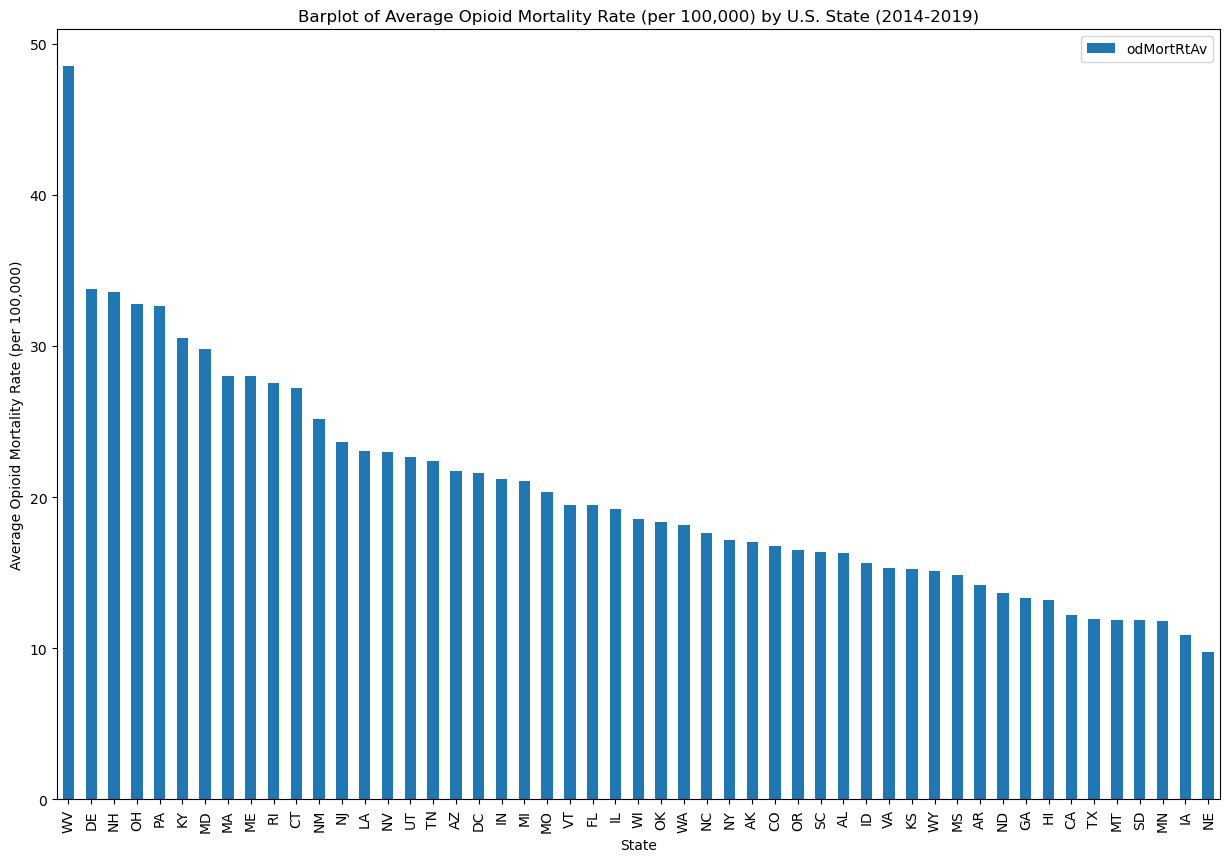

In [29]:
df_sort_descend.plot.bar(x='st_abb', y='odMortRtAv', title = "Barplot of Average Opioid Mortality Rate (per 100,000) by U.S. State (2014-2019)",
                         xlabel = "State", ylabel = "Average Opioid Mortality Rate (per 100,000)",
                        figsize = [15,10])
plt.show()

### Subset the data to only those states with odMortRtAv in the upper quartile

In [61]:
upper_quartile_subset = df_sort_descend.loc[df_sort_descend['odMortRtAv'] >= upper_quartile]
upper_quartile_subset

,G_STATEFP,STATEFP,st_abb,st_name,opPrscRt19,prMisuse19,odMortRt14,odMortRt15,odMortRt16,odMortRt17,odMortRt18,odMortRt19,odMortRtAv
48,G54,54,WV,West Virginia,42.5,3.22,35.5,41.5,52.0,57.8,51.5,52.8,48.52
7,G10,10,DE,Delaware,39.9,3.45,20.9,22.0,30.8,37.0,43.8,48.0,33.75
29,G33,33,NH,New Hampshire,50.3,3.38,26.2,34.3,39.0,37.0,33.1,32.0,33.60
35,G39,39,OH,Ohio,50.8,3.95,24.6,29.9,39.1,46.3,18.4,38.3,32.77
38,G42,42,PA,Pennsylvania,47.0,3.17,21.9,26.3,37.9,44.3,30.1,35.6,32.68
17,G21,21,KY,Kentucky,72.3,4.14,24.7,29.9,33.5,37.2,25.4,32.5,30.53
20,G24,24,MD,Maryland,42.3,3.45,17.4,20.9,33.2,36.3,32.8,38.2,29.80
21,G25,25,MA,Massachusetts,44.1,3.24,19.0,25.7,33.0,31.8,26.6,32.1,28.03
19,G23,23,ME,Maine,35.4,3.27,16.8,21.2,28.7,34.4,37.2,29.9,28.03
39,G44,44,RI,Rhode Island,40.3,3.33,23.4,28.2,30.8,31.0,22.6,29.5,27.58


In [18]:
top_ten = df_sort_descend.iloc[0:10]
top_ten

,G_STATEFP,STATEFP,st_abb,st_name,opPrscRt19,prMisuse19,odMortRt14,odMortRt15,odMortRt16,odMortRt17,odMortRt18,odMortRt19,odMortRtAv
48,G54,54,WV,West Virginia,42.5,3.22,35.5,41.5,52.0,57.8,51.5,52.8,48.52
7,G10,10,DE,Delaware,39.9,3.45,20.9,22.0,30.8,37.0,43.8,48.0,33.75
29,G33,33,NH,New Hampshire,50.3,3.38,26.2,34.3,39.0,37.0,33.1,32.0,33.60
35,G39,39,OH,Ohio,50.8,3.95,24.6,29.9,39.1,46.3,18.4,38.3,32.77
38,G42,42,PA,Pennsylvania,47.0,3.17,21.9,26.3,37.9,44.3,30.1,35.6,32.68
17,G21,21,KY,Kentucky,72.3,4.14,24.7,29.9,33.5,37.2,25.4,32.5,30.53
20,G24,24,MD,Maryland,42.3,3.45,17.4,20.9,33.2,36.3,32.8,38.2,29.80
21,G25,25,MA,Massachusetts,44.1,3.24,19.0,25.7,33.0,31.8,26.6,32.1,28.03
19,G23,23,ME,Maine,35.4,3.27,16.8,21.2,28.7,34.4,37.2,29.9,28.03
39,G44,44,RI,Rhode Island,40.3,3.33,23.4,28.2,30.8,31.0,22.6,29.5,27.58


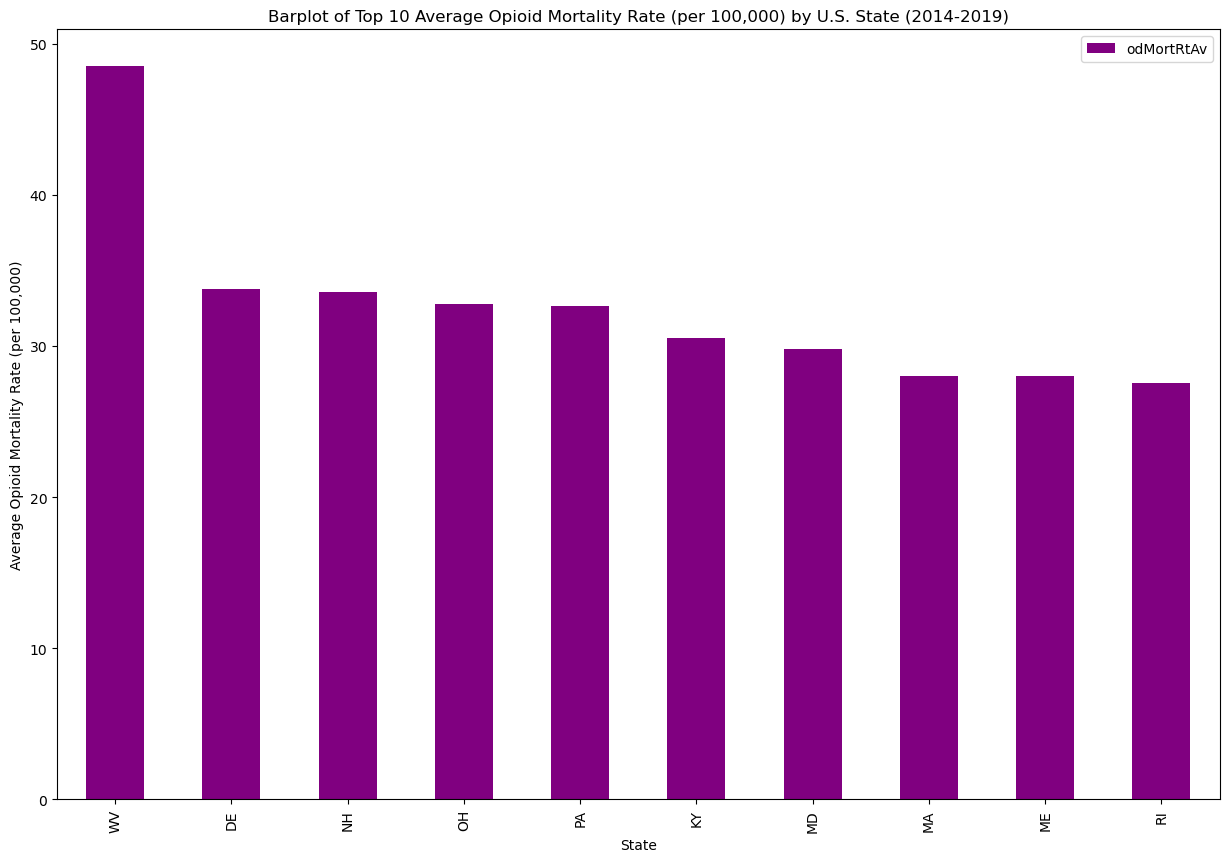

In [65]:
top_ten.plot.bar(x='st_abb', y='odMortRtAv', title = "Barplot of Top 10 Average Opioid Mortality Rate (per 100,000) by U.S. State (2014-2019)",
                         xlabel = "State", ylabel = "Average Opioid Mortality Rate (per 100,000)",
                            color = 'purple', figsize = [15,10])
plt.show()

### Consideration the time limitations of this project, we will focus focus further analyses on the Top Ten

In [91]:
top_ten_st_abb = list(top_ten['st_abb'])
top_ten_st_abb

['WV', 'DE', 'NH', 'OH', 'PA', 'KY', 'MD', 'MA', 'ME', 'RI']

### Go to opioid-analysis/Resources/NSSATS/NSSATS_PUF_2020_CSV.csv